___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [50]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [51]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [52]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [53]:
df.shape

(10000, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [55]:
df.isnull().any().sum()

0

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [57]:
df = df.drop('RowNumber', axis = 1)

In [58]:
df = df.drop('CustomerId', axis = 1)

In [59]:
df = df.drop('Surname', axis = 1)

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

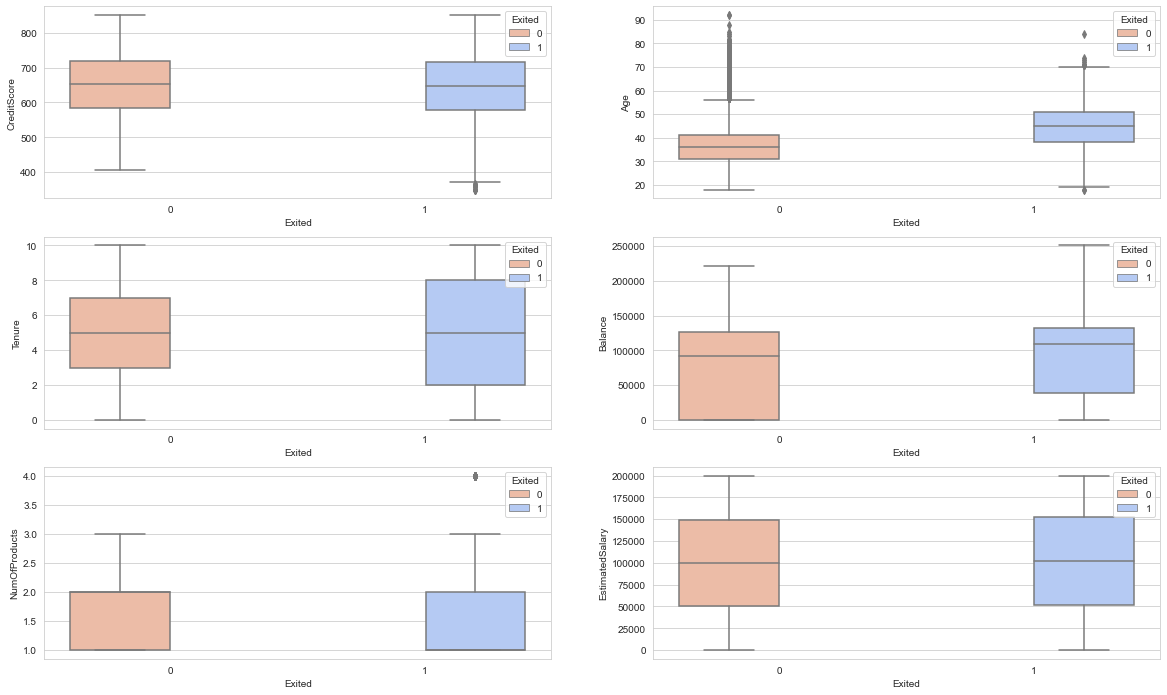

In [61]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
ax= sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0],palette="coolwarm_r")
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1],palette="coolwarm_r")
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0],palette="coolwarm_r")
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1],palette="coolwarm_r")
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0],palette="coolwarm_r")
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1],palette="coolwarm_r")

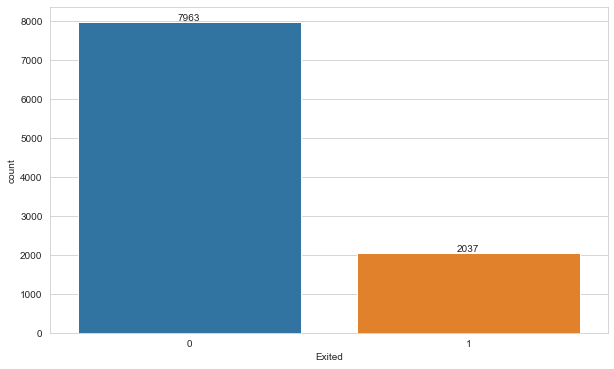

In [62]:
ax = sns.countplot(df['Exited'])
ax.bar_label(ax.containers[0]);

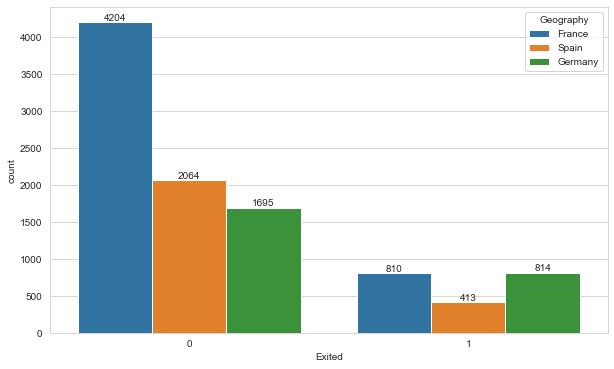

In [63]:
ax = sns.countplot(x='Exited',data=df, hue='Geography')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

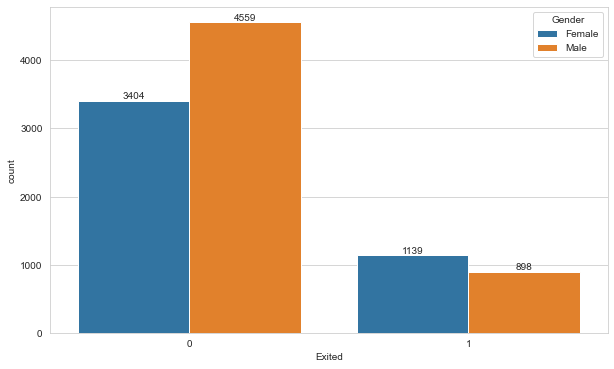

In [64]:
ax = sns.countplot(x='Exited',data=df,hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

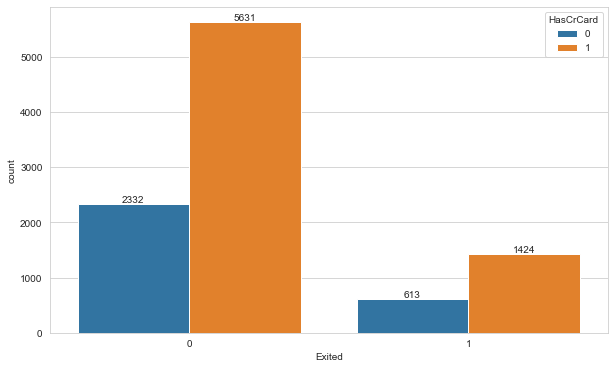

In [65]:
ax = sns.countplot(x='Exited',data=df, hue='HasCrCard')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

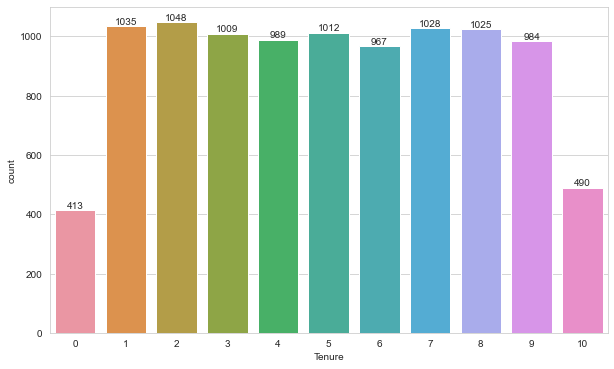

In [66]:
ax = sns.countplot(df["Tenure"])
ax.bar_label(ax.containers[0]);

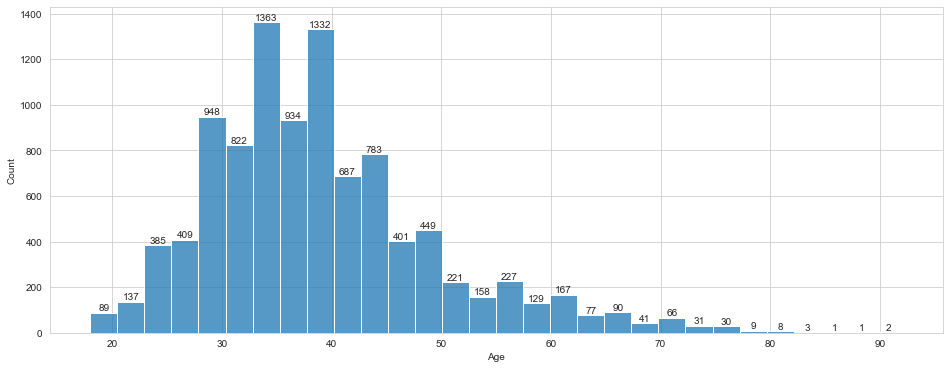

In [67]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x="Age",bins=30);
ax.bar_label(ax.containers[0]);

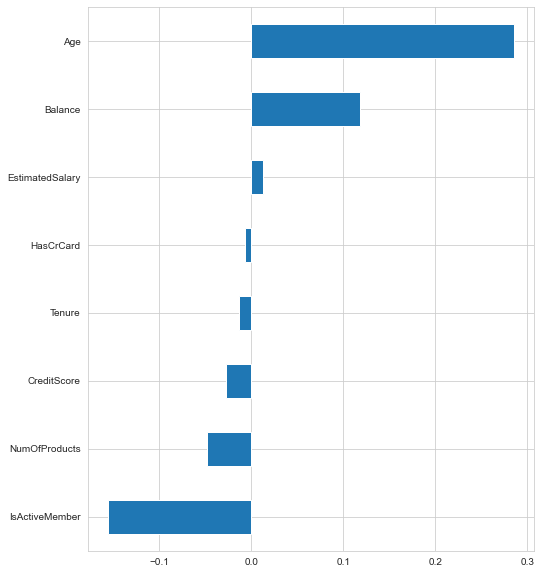

In [68]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

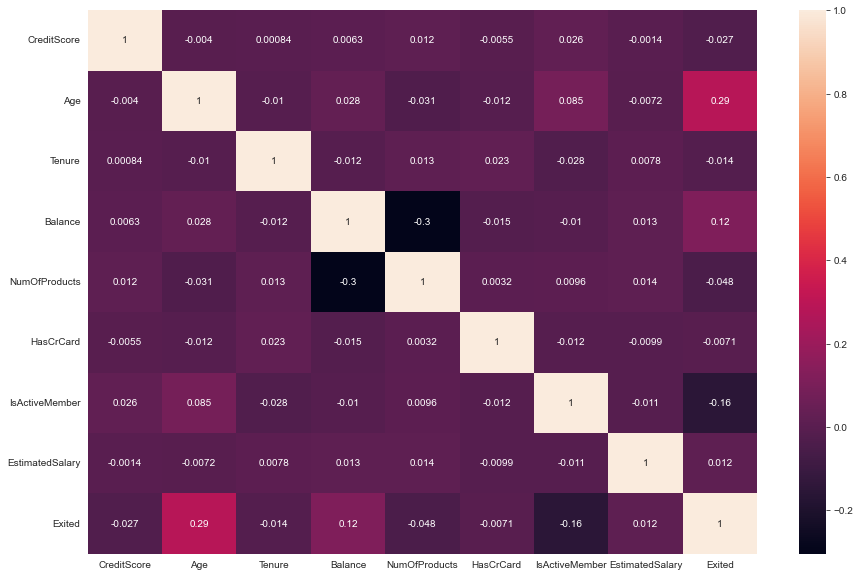

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

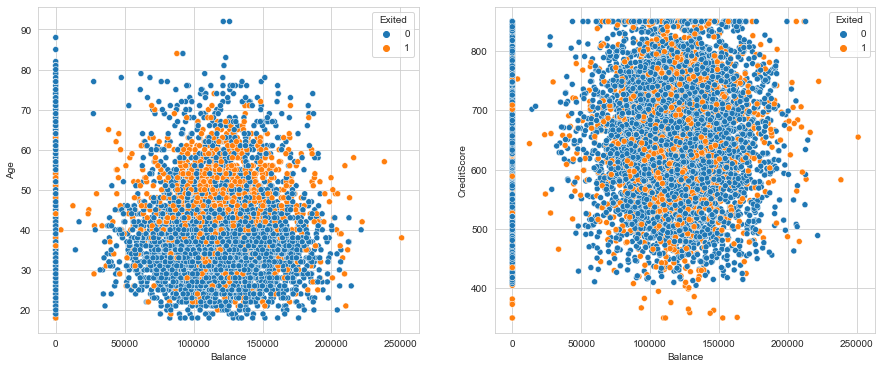

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = df, hue="Exited", ax = ax[1])

In [71]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Geography'] = label.fit_transform(df['Geography'])
df['Gender'] = label.fit_transform(df['Gender'])

In [72]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000,1,1,1,101348.880,1
1,608,2,0,41,1,83807.860,1,0,1,112542.580,0
2,502,0,0,42,8,159660.800,3,1,0,113931.570,1
3,699,0,0,39,1,0.000,2,0,0,93826.630,0
4,850,2,0,43,2,125510.820,1,1,1,79084.100,0


## Preprocessing of Data
- Train | Test Split, Scalling

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [75]:
seed = 101

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler()

In [79]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
print(X_train.shape)
print(X_test.shape)

(7000, 10)
(3000, 10)


In [81]:
print(y_train.shape)
print(y_test.shape)

(7000,)
(3000,)


## Modelling & Model Performance

### Import related libraries

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Creating Model

### without class_weigth

In [83]:
tf.random.set_seed(seed)  

model = Sequential()
model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))  
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#### Evaluate

In [84]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
197/197 [==============================] - 1s 2ms/step - loss: 0.5722 - accuracy: 0.7006 - val_loss: 0.4844 - val_accuracy: 0.8043
Epoch 2/1000
197/197 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7954 - val_loss: 0.4629 - val_accuracy: 0.8043
Epoch 3/1000
197/197 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7971 - val_loss: 0.4509 - val_accuracy: 0.8029
Epoch 4/1000
197/197 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7997 - val_loss: 0.4437 - val_accuracy: 0.8100
Epoch 5/1000
197/197 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8017 - val_loss: 0.4380 - val_accuracy: 0.8114
Epoch 6/1000
197/197 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8068 - val_loss: 0.4333 - val_accuracy: 0.8029
Epoch 7/1000
197/197 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8086 - val_loss: 0.4304 - val_accuracy:

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                198       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.572,0.701,0.484,0.804
1,0.482,0.795,0.463,0.804
2,0.469,0.797,0.451,0.803
3,0.459,0.800,0.444,0.810
4,0.451,0.802,0.438,0.811


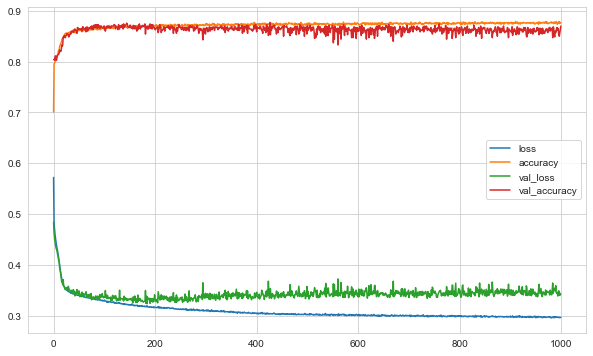

In [87]:
loss_df.plot();

In [88]:
model.evaluate(X_test, y_test, verbose=0)

[0.37628409266471863, 0.8456666469573975]

In [89]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37628409266471863
accuracy :  0.8456666469573975


In [90]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)   
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2279  110]
 [ 353  258]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2389
           1       0.70      0.42      0.53       611

    accuracy                           0.85      3000
   macro avg       0.78      0.69      0.72      3000
weighted avg       0.83      0.85      0.83      3000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [91]:
from sklearn.utils import class_weight

In [92]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights

array([0.62791532, 2.45441795])

In [93]:
model.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size = 32, epochs = 1000, verbose=1, class_weight={0 :class_weights[0], 1: class_weights[1]})

Epoch 1/1000
175/175 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.8200 - val_loss: 0.4330 - val_accuracy: 0.8043
Epoch 2/1000
175/175 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8195 - val_loss: 0.3714 - val_accuracy: 0.8386
Epoch 3/1000
175/175 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8188 - val_loss: 0.4226 - val_accuracy: 0.8129
Epoch 4/1000
175/175 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8171 - val_loss: 0.4131 - val_accuracy: 0.8164
Epoch 5/1000
175/175 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8157 - val_loss: 0.3697 - val_accuracy: 0.8386
Epoch 6/1000
175/175 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8205 - val_loss: 0.4490 - val_accuracy: 0.7957
Epoch 7/1000
175/175 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8211 - val_loss: 0.4133 - val_accuracy:

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                198       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.428,0.820,0.433,0.804
1,0.416,0.819,0.371,0.839
2,0.414,0.819,0.423,0.813
3,0.414,0.817,0.413,0.816
4,0.413,0.816,0.370,0.839


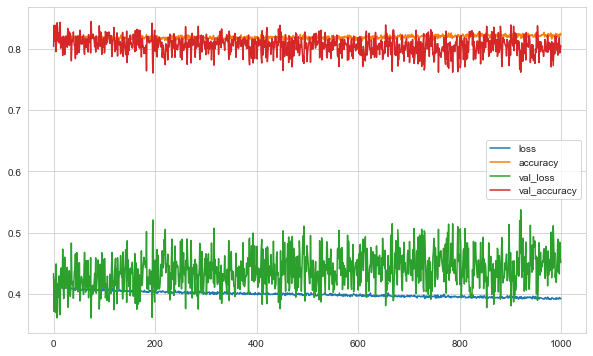

In [96]:
loss_df.plot();

In [97]:
#model.evaluate(X_test, y_test, verbose=0)

#### Evaluate

In [99]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 0.7723


[0.4975782036781311, 0.7723333239555359]

In [101]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4975782036781311
accuracy :  0.7723333239555359


              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2389
           1       0.46      0.66      0.54       611

    accuracy                           0.77      3000
   macro avg       0.68      0.73      0.70      3000
weighted avg       0.81      0.77      0.79      3000



Text(133.0, 0.5, 'True_number')

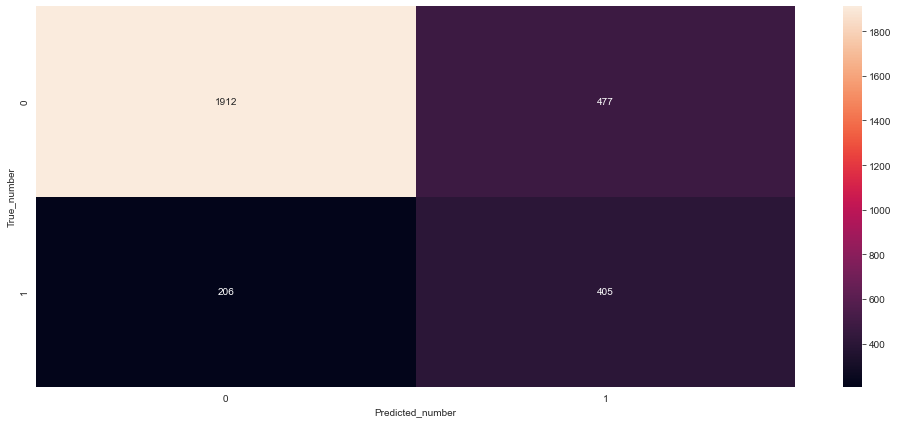

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

#print classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# ploting the confusion metrix plot

conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

## GridSearchCV

In [104]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [105]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [106]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

#### Evaluate

In [107]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
197/197 [==============================] - 1s 2ms/step - loss: 0.4865 - accuracy: 0.7876 - val_loss: 0.4757 - val_accuracy: 0.7800
Epoch 2/200
197/197 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8070 - val_loss: 0.4199 - val_accuracy: 0.8214
Epoch 3/200
197/197 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8217 - val_loss: 0.3922 - val_accuracy: 0.8229
Epoch 4/200
197/197 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8441 - val_loss: 0.3517 - val_accuracy: 0.8457
Epoch 5/200
197/197 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8527 - val_loss: 0.3620 - val_accuracy: 0.8557
Epoch 6/200
197/197 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8565 - val_loss: 0.3469 - val_accuracy: 0.8614
Epoch 7/200
197/197 [==============================] - 0s 1ms/step - loss: 0.35

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001FC23B69A00>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [108]:
grid_model.best_score_

0.8622857142857143

In [109]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [110]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.857,0.013,7,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.851,0.015,18,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.677,0.238,24,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.854,0.013,13,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.858,0.014,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.855,0.018,9,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.796,0.009,19,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.858,0.019,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.862,0.015,1,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.854,0.013,11,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.73      0.43      0.54       611

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



Text(133.0, 0.5, 'True_number')

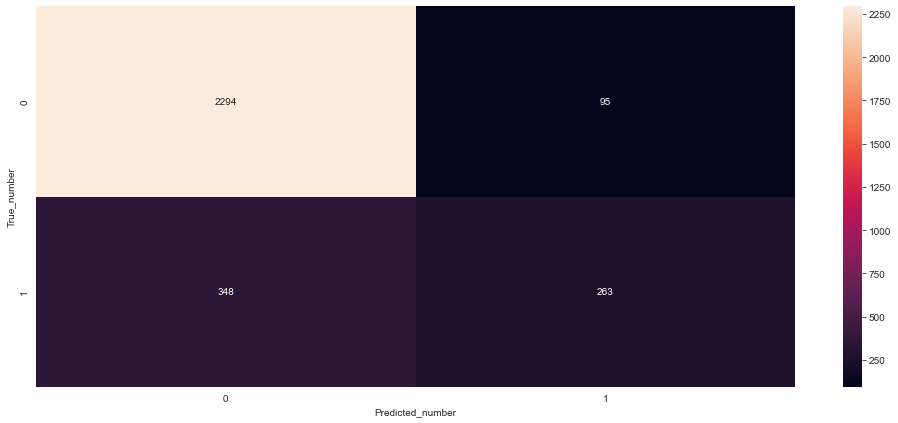

In [111]:
#print classification_report
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# ploting the confusion metrix plot

conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

#### for keras models without clasweight

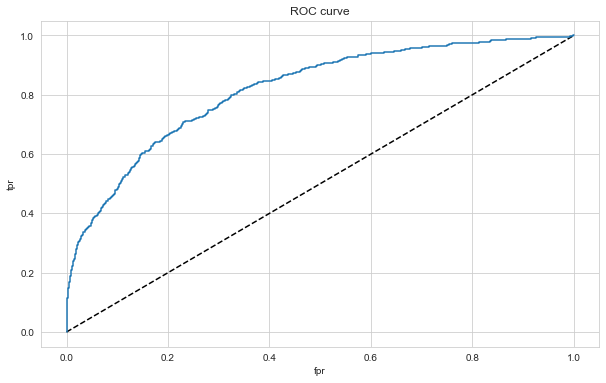

In [112]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [113]:
roc_auc_score(y_test, y_pred_proba)

0.8161979448906231

#### for keras models with clasweight

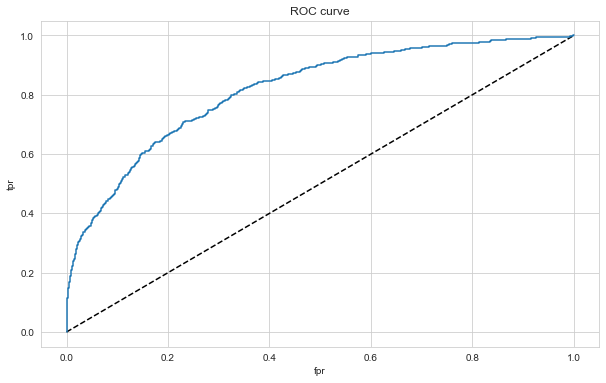

In [115]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [116]:
roc_auc_score(y_test, y_pred_proba)

0.8161979448906231

#### for gridsearchcv model

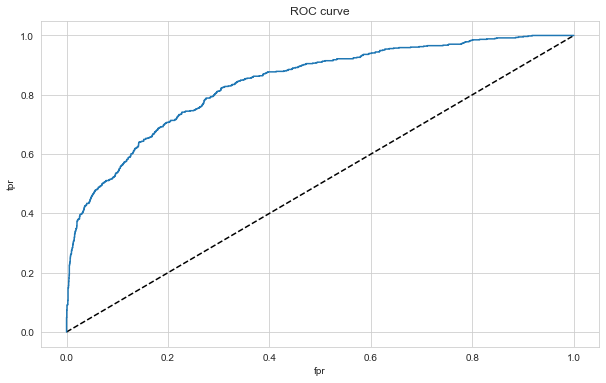

In [117]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [118]:
roc_auc_score(y_test, y_pred_proba)

0.8390998979912707

## Final Model and Model Deployment

In [119]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [120]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [121]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1, callbacks = [early_stop])

Epoch 1/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8747 - val_loss: 0.4026 - val_accuracy: 0.8267
Epoch 2/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8780 - val_loss: 0.4069 - val_accuracy: 0.8290
Epoch 3/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8750 - val_loss: 0.4085 - val_accuracy: 0.8273
Epoch 4/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8753 - val_loss: 0.4052 - val_accuracy: 0.8347
Epoch 5/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8757 - val_loss: 0.4012 - val_accuracy: 0.8267
Epoch 6/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8767 - val_loss: 0.4006 - val_accuracy: 0.8273
Epoch 7/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8761 - val_loss: 0.3988 - val_accuracy:

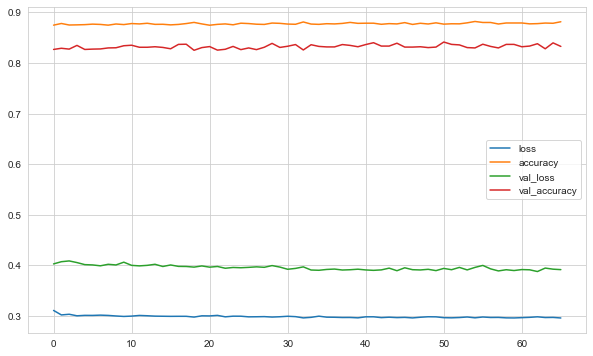

In [122]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [123]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.39128535985946655
accuracy :  0.8326666951179504


In [124]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2211  178]
 [ 324  287]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2389
           1       0.62      0.47      0.53       611

    accuracy                           0.83      3000
   macro avg       0.74      0.70      0.72      3000
weighted avg       0.82      0.83      0.82      3000



In [125]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [126]:
model.save('model_churn.h5')

In [127]:
from tensorflow.keras.models import load_model

In [128]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

### Prediction

In [129]:
single_churn = df.drop('Exited', axis = 1).iloc[10:15, :]
single_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10,528,0,1,31,6,102016.720,2,0,0,80181.120
11,497,2,1,24,3,0.000,2,1,0,76390.010
12,476,0,0,34,10,0.000,2,1,0,26260.980
13,549,0,0,25,5,0.000,2,0,0,190857.790
14,635,2,0,35,7,0.000,2,1,1,65951.650


In [130]:
single_churn = scaler_churn.transform(single_churn)
single_churn

array([[0.356     , 0.        , 1.        , 0.17567568, 0.6       ,
        0.45898145, 0.33333333, 0.        , 0.        , 0.40092957],
       [0.294     , 1.        , 1.        , 0.08108108, 0.3       ,
        0.        , 0.33333333, 1.        , 0.        , 0.38197015],
       [0.252     , 0.        , 0.        , 0.21621622, 1.        ,
        0.        , 0.33333333, 1.        , 0.        , 0.13127381],
       [0.398     , 0.        , 0.        , 0.09459459, 0.5       ,
        0.        , 0.33333333, 0.        , 0.        , 0.95442594],
       [0.57      , 1.        , 0.        , 0.22972973, 0.7       ,
        0.        , 0.33333333, 1.        , 1.        , 0.32976769]])

In [131]:
prediction = (pd.DataFrame(model_churn.predict(single_churn) > 0.5, columns=["prediction"]).astype("int32"))
prediction

,prediction
0,0
1,0
2,0
3,0
4,0


In [132]:
actual = pd.DataFrame(df.sample(n=5, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("int32")
actual

,actual
6676,0
6421,0
9834,1
8492,0
9982,1


In [133]:
pred_df = actual.join(prediction.set_index(actual.index))
pred_df

,actual,prediction
6676,0,0
6421,0,0
9834,1,0
8492,0,0
9982,1,0


In [134]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "Correct Pred" if int(x['actual'] == x['prediction']) else "Wrong Pred", axis=1)
pred_df

,actual,prediction,prediction_accuracy
6676,0,0,Correct Pred
6421,0,0,Correct Pred
9834,1,0,Wrong Pred
8492,0,0,Correct Pred
9982,1,0,Wrong Pred


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___